In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Modelos Machine Learning

In [3]:
X_test_processed = pd.read_csv('/content/drive/MyDrive/PROYECTO FINAL UTN/data/processed/X_test_processed.csv')
X_train_processed = pd.read_csv('/content/drive/MyDrive/PROYECTO FINAL UTN/data/processed/X_train_processed.csv')
y_test_encoded = pd.read_csv('/content/drive/MyDrive/PROYECTO FINAL UTN/data/processed/y_test_encoded.csv')
y_train_encoded = pd.read_csv('/content/drive/MyDrive/PROYECTO FINAL UTN/data/processed/y_train_encoded.csv')

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(
        random_state=42,learning_rate = 0.05, max_depth = 3, n_estimators = 100),
    "LightGBM": lgb.LGBMClassifier(
        random_state=42,learning_rate = 0.01, n_estimators = 200, num_leaves = 31),
    "Naive Bayes": GaussianNB(),
    # "SVM": SVC(random_state=42, probability=True)
}


results = {}


for name, model in models.items():
    print(f"Training {name}...")

    if isinstance(model, GaussianNB) or isinstance(model, SVC):
        X_train_dense = X_train_processed.values
        X_test_dense = X_test_processed.values
        model.fit(X_train_dense, y_train_encoded)
        y_pred = model.predict(X_test_dense)
        y_proba = model.predict_proba(X_test_dense)[:, 1] if hasattr(model, 'predict_proba') else [0] * len(y_test_encoded)
    else:
        model.fit(X_train_processed, y_train_encoded)
        y_pred = model.predict(X_test_processed)
        y_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, 'predict_proba') else [0] * len(y_test_encoded)


    accuracy = accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)

    auc_roc = roc_auc_score(y_test_encoded, y_proba) if hasattr(model, 'predict_proba') else None


    results[name] = {"Accuracy": accuracy, "F1 Score": f1, "AUC ROC": auc_roc}


results_df = pd.DataFrame(results).T


print("\nComparación de modelos:")
display(results_df)

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training XGBoost...
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
Training Naive Bayes...

Comparación de modelos:


,Accuracy,F1 Score,AUC ROC
Logistic Regression,0.821859,0.640916,0.862092
Decision Tree,0.765791,0.524496,0.676883
Random Forest,0.800568,0.553259,0.845526
XGBoost,0.809084,0.590563,0.862877
LightGBM,0.809794,0.575949,0.860696
Naive Bayes,0.264727,0.418631,0.500000


### Evaluacion de modelos

Evaluating Logistic Regression...


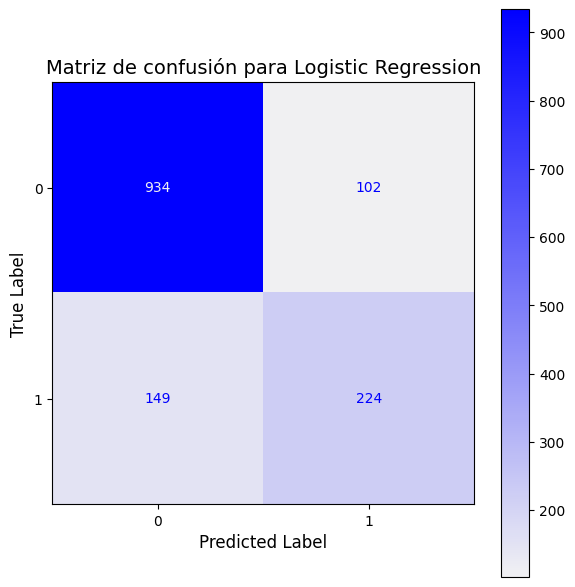

Evaluating XGBoost...


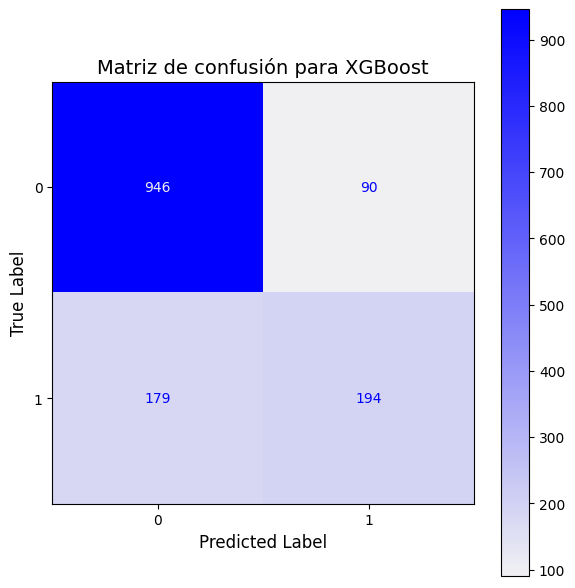

Evaluating LightGBM...


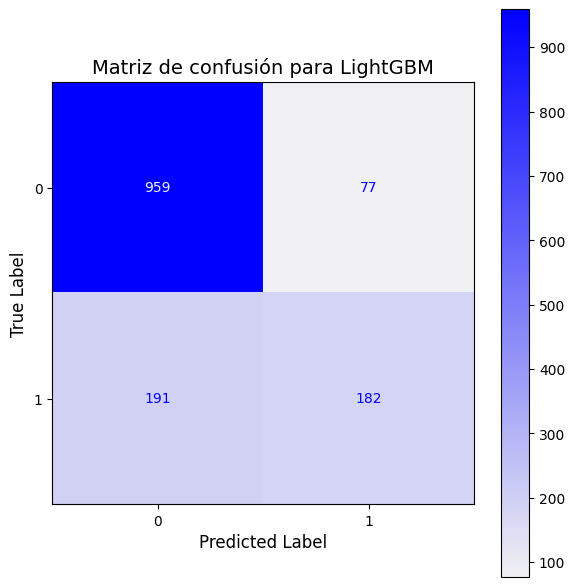


Métricas:


,Accuracy,Precision,Recall,F1 Score,AUC ROC
Logistic Regression,0.821859,0.687117,0.600536,0.640916,0.862092
XGBoost,0.809084,0.683099,0.520107,0.590563,0.862877
LightGBM,0.809794,0.702703,0.487936,0.575949,0.860696


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

models_to_evaluate_metrics = {
    "Logistic Regression": models["Logistic Regression"],
    "XGBoost": models["XGBoost"],
    "LightGBM": models["LightGBM"]
}

detailed_metrics_results = {}

for name, model in models_to_evaluate_metrics.items():
    print(f"Evaluating {name}...")

    if isinstance(model, GaussianNB) or isinstance(model, SVC):
        X_test_dense = X_test_processed.toarray()
        y_pred = model.predict(X_test_dense)
        y_proba = model.predict_proba(X_test_dense)[:, 1] if hasattr(model, 'predict_proba') else [0] * len(y_test_encoded)
    else:
        y_pred = model.predict(X_test_processed)
        y_proba = model.predict_proba(X_test_processed)[:, 1] if hasattr(model, 'predict_proba') else [0] * len(y_test_encoded)


    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    auc_roc = roc_auc_score(y_test_encoded, y_proba) if hasattr(model, 'predict_proba') else None


    detailed_metrics_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC ROC": auc_roc
    }

    cm = confusion_matrix(y_test_encoded, y_pred)

    cmap = sns.light_palette("blue", as_cmap=True)

    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=cmap, ax=ax)
    ax.set_title(f'Matriz de confusión para {name}', fontsize=14)
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

detailed_metrics_df = pd.DataFrame(detailed_metrics_results).T
print("\nMétricas:")
display(detailed_metrics_df)

SHAP Summary Plot:


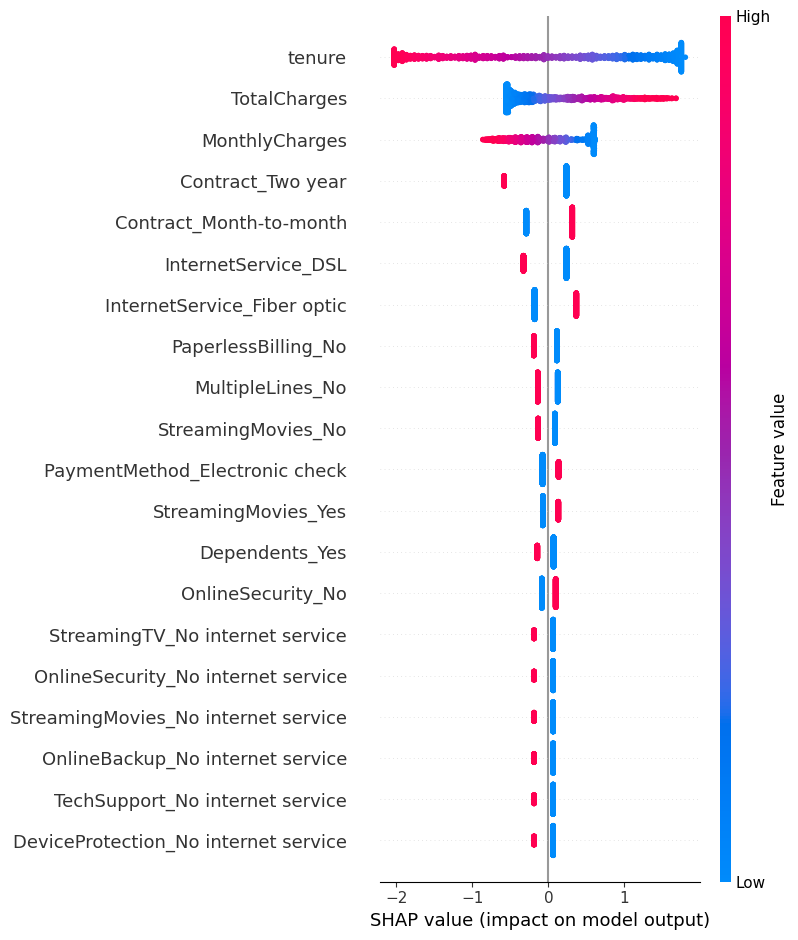


SHAP Force Plot for the first instance:


In [7]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

if isinstance(X_test_processed, pd.DataFrame) and all(isinstance(col, str) for col in X_test_processed.columns):
    feature_names = X_test_processed.columns.tolist()
else:
    print("Warning: Processed data does not have string column names. Feature names will be generic.")
    num_features = X_test_processed.shape[1]
    feature_names = [f"Feature {i}" for i in range(num_features)]

logistic_regression_model = models["Logistic Regression"]

explainer = shap.LinearExplainer(logistic_regression_model, X_train_processed)

shap_values = explainer.shap_values(X_test_processed)


print("SHAP Summary Plot:")
shap.initjs()
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names)

print("\nSHAP Force Plot for the first instance:")
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_processed.iloc[0,:].values, feature_names=feature_names)